In [66]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('online_retail_II.xlsx')

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
print('Total data points:', df.shape[0])

Total data points: 525461


## Data Cleaning

In [5]:
print(df.isnull().sum())

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [6]:
df.drop(columns=["Description", "Customer ID"], inplace=True)

In [7]:
df.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Country
0,489434,85048,12,2009-12-01 07:45:00,6.95,United Kingdom
1,489434,79323P,12,2009-12-01 07:45:00,6.75,United Kingdom
2,489434,79323W,12,2009-12-01 07:45:00,6.75,United Kingdom
3,489434,22041,48,2009-12-01 07:45:00,2.10,United Kingdom
4,489434,21232,24,2009-12-01 07:45:00,1.25,United Kingdom


In [8]:
df["Date"] = pd.to_datetime(df["InvoiceDate"]).dt.date
df["Time"] = pd.to_datetime(df["InvoiceDate"]).dt.time

In [9]:
df.drop(columns=["InvoiceDate"], inplace=True)

In [10]:
df.head()

,Invoice,StockCode,Quantity,Price,Country,Date,Time
0,489434,85048,12,6.95,United Kingdom,2009-12-01,07:45:00
1,489434,79323P,12,6.75,United Kingdom,2009-12-01,07:45:00
2,489434,79323W,12,6.75,United Kingdom,2009-12-01,07:45:00
3,489434,22041,48,2.10,United Kingdom,2009-12-01,07:45:00
4,489434,21232,24,1.25,United Kingdom,2009-12-01,07:45:00


## Feature Engineering

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

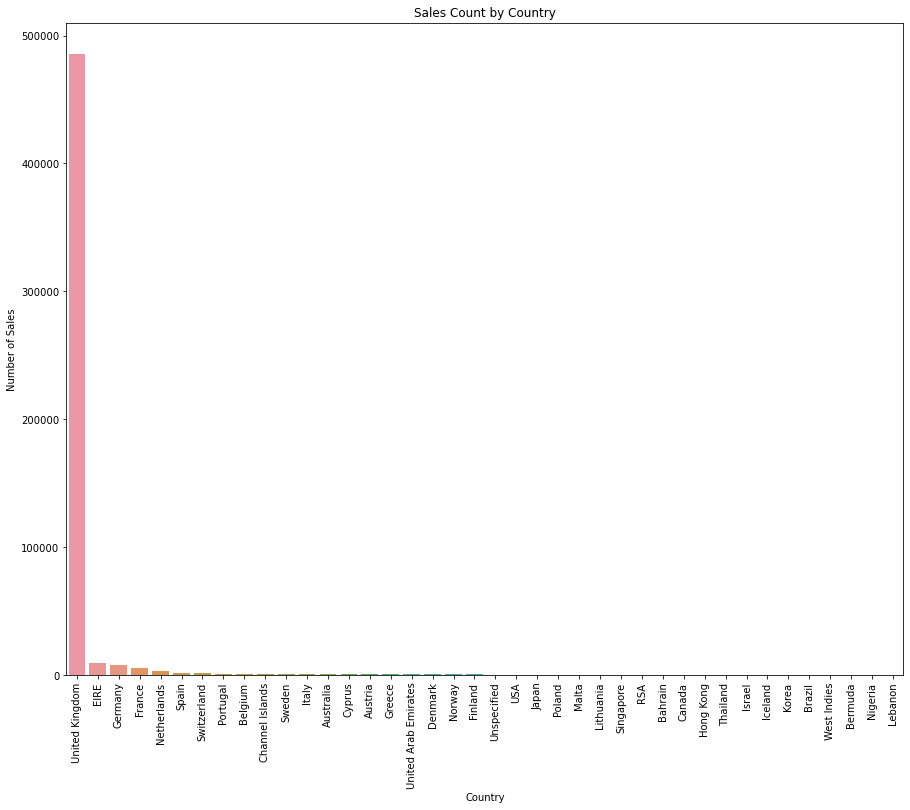

In [12]:
plt.figure(figsize=(15, 12))
sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Sales')
plt.title('Sales Count by Country')
plt.show()

In [13]:
df['Country'].value_counts()

United Kingdom          485852
EIRE                      9670
Germany                   8129
France                    5772
Netherlands               2769
Spain                     1278
Switzerland               1187
Portugal                  1101
Belgium                   1054
Channel Islands            906
Sweden                     902
Italy                      731
Australia                  654
Cyprus                     554
Austria                    537
Greece                     517
United Arab Emirates       432
Denmark                    428
Norway                     369
Finland                    354
Unspecified                310
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
RSA                        111
Bahrain                    107
Canada                      77
Hong Kong                   76
Thailand                    76
Israel  

### Keeping only the data that belongs to the United Kingdom as it has over 95% of the total data

In [14]:
df = df[df['Country'] == 'United Kingdom']

In [15]:
print('Total data points:', df.shape[0])

Total data points: 485852


In [16]:
df.drop(columns=["Country"], inplace=True)

In [17]:
df.head()

,Invoice,StockCode,Quantity,Price,Date,Time
0,489434,85048,12,6.95,2009-12-01,07:45:00
1,489434,79323P,12,6.75,2009-12-01,07:45:00
2,489434,79323W,12,6.75,2009-12-01,07:45:00
3,489434,22041,48,2.10,2009-12-01,07:45:00
4,489434,21232,24,1.25,2009-12-01,07:45:00


In [18]:
data = df.copy()

In [19]:
data.head()

,Invoice,StockCode,Quantity,Price,Date,Time
0,489434,85048,12,6.95,2009-12-01,07:45:00
1,489434,79323P,12,6.75,2009-12-01,07:45:00
2,489434,79323W,12,6.75,2009-12-01,07:45:00
3,489434,22041,48,2.10,2009-12-01,07:45:00
4,489434,21232,24,1.25,2009-12-01,07:45:00


In [20]:
data['Hour'] = data['Time'].apply(lambda x: x.hour)

In [21]:
data['Sales'] = data['Quantity'] * data['Price']

In [22]:
data['Sales'] = data['Sales'].abs()

In [23]:
data.head()

,Invoice,StockCode,Quantity,Price,Date,Time,Hour,Sales
0,489434,85048,12,6.95,2009-12-01,07:45:00,7,83.4
1,489434,79323P,12,6.75,2009-12-01,07:45:00,7,81.0
2,489434,79323W,12,6.75,2009-12-01,07:45:00,7,81.0
3,489434,22041,48,2.10,2009-12-01,07:45:00,7,100.8
4,489434,21232,24,1.25,2009-12-01,07:45:00,7,30.0


In [24]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [25]:
data['year'] = data['Date'].dt.year
data['quarter'] = data['Date'].dt.quarter
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

In [26]:
data.head()

,Invoice,StockCode,Quantity,Price,Date,Time,Hour,Sales,year,quarter,month,day
0,489434,85048,12,6.95,2009-12-01,07:45:00,7,83.4,2009,4,12,1
1,489434,79323P,12,6.75,2009-12-01,07:45:00,7,81.0,2009,4,12,1
2,489434,79323W,12,6.75,2009-12-01,07:45:00,7,81.0,2009,4,12,1
3,489434,22041,48,2.10,2009-12-01,07:45:00,7,100.8,2009,4,12,1
4,489434,21232,24,1.25,2009-12-01,07:45:00,7,30.0,2009,4,12,1


In [27]:
import calendar
data['month'] = data['month'].apply(lambda x: calendar.month_name[x])

In [28]:
data.head()

,Invoice,StockCode,Quantity,Price,Date,Time,Hour,Sales,year,quarter,month,day
0,489434,85048,12,6.95,2009-12-01,07:45:00,7,83.4,2009,4,December,1
1,489434,79323P,12,6.75,2009-12-01,07:45:00,7,81.0,2009,4,December,1
2,489434,79323W,12,6.75,2009-12-01,07:45:00,7,81.0,2009,4,December,1
3,489434,22041,48,2.10,2009-12-01,07:45:00,7,100.8,2009,4,December,1
4,489434,21232,24,1.25,2009-12-01,07:45:00,7,30.0,2009,4,December,1


In [29]:
data.drop(columns=["Invoice", "StockCode"], inplace=True)

In [30]:
data.head()

,Quantity,Price,Date,Time,Hour,Sales,year,quarter,month,day
0,12,6.95,2009-12-01,07:45:00,7,83.4,2009,4,December,1
1,12,6.75,2009-12-01,07:45:00,7,81.0,2009,4,December,1
2,12,6.75,2009-12-01,07:45:00,7,81.0,2009,4,December,1
3,48,2.10,2009-12-01,07:45:00,7,100.8,2009,4,December,1
4,24,1.25,2009-12-01,07:45:00,7,30.0,2009,4,December,1


## Data Visualization and Analysis

In [31]:
sales_per_hour = data.groupby('Hour')['Sales'].sum()

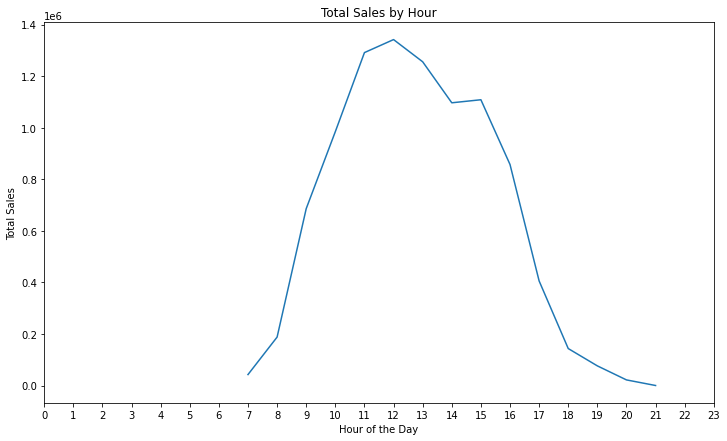

In [32]:
plt.figure(figsize=(12, 7))
plt.plot(sales_per_hour.index, sales_per_hour.values, linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.title('Total Sales by Hour')
plt.xticks(range(0, 24))
plt.show()

In [33]:
sales_by_year = data.groupby('year')['Sales'].sum().reset_index()

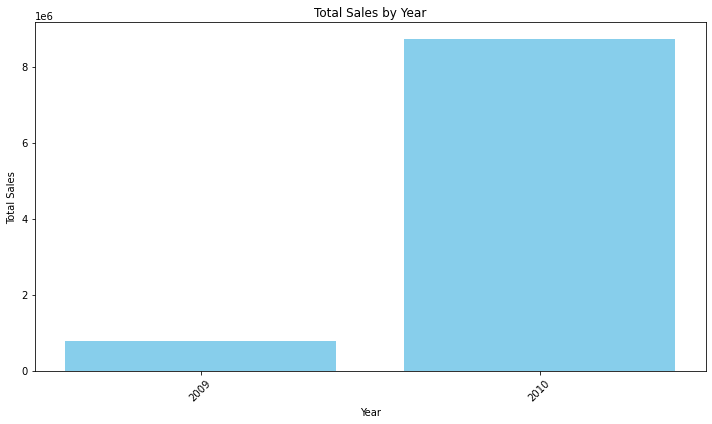

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(sales_by_year['year'].astype(str), sales_by_year['Sales'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
sales_by_month = data.groupby('month')['Sales'].sum().reset_index()
average_sales = sales_by_month['Sales'].mean()

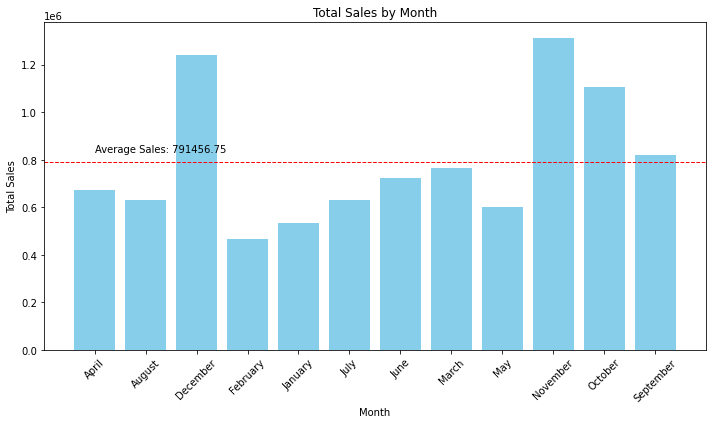

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(sales_by_month['month'].astype(str), sales_by_month['Sales'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.xticks(rotation=45)
plt.axhline(y=average_sales, color='red', linestyle='--', linewidth=1)
plt.text(x=0, y=average_sales + 0.05 * average_sales, s=f'Average Sales: {average_sales:.2f}', color='black')
plt.tight_layout()
plt.show()

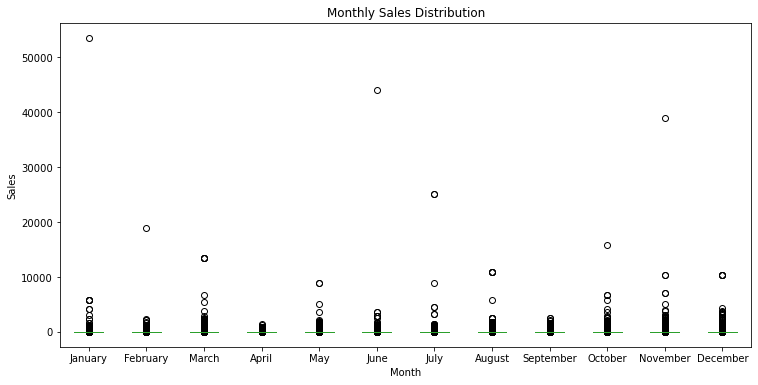

In [37]:
fig, ax = plt.subplots(figsize=(12, 6))
data.boxplot(column='Sales', by='month', grid=False, ax=ax)
plt.xticks(ticks=range(1, 13), labels=[calendar.month_name[i] for i in range(1, 13)])
plt.title('Monthly Sales Distribution')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [51]:
daily_sales = data.groupby('Date')['Sales'].sum()

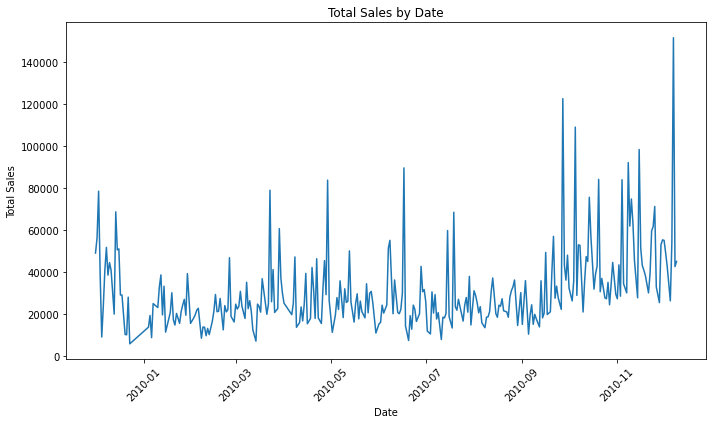

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales by Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Pre-processing

In [67]:
dx = data.groupby("Date")["Sales"].sum().reset_index()

In [68]:
dx.head(20)

,Date,Sales
0,2009-12-01,48969.55
1,2009-12-02,56238.96
2,2009-12-03,78431.92
3,2009-12-04,38405.57
4,2009-12-05,9042.36
5,2009-12-06,23500.39
6,2009-12-07,40807.44
7,2009-12-08,51666.84
8,2009-12-09,38468.69
9,2009-12-10,44437.11


## Time-series Analysis

In [69]:
dx['Date'] = pd.to_datetime(dx['Date'])
dx = dx.sort_values('Date')

In [76]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

In [71]:
train = dx.iloc[:-30]
test = dx.iloc[-30:]

In [73]:
result = adfuller(train['Sales'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.9431353131999094
p-value: 0.0405569865775913


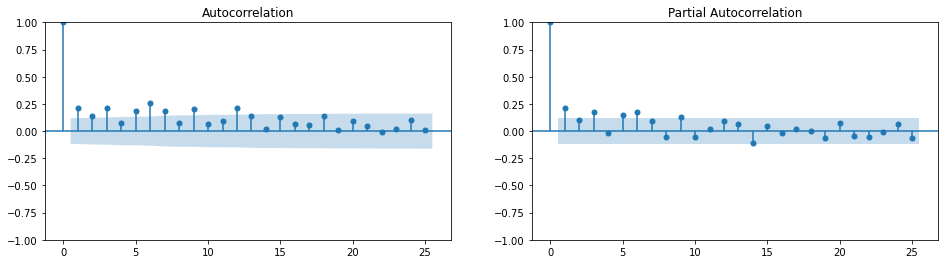

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(train['Sales'], ax=axes[0])
plot_pacf(train['Sales'], ax=axes[1])
plt.show()

In [78]:
auto_model = auto_arima(train['Sales'], seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6111.065, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6255.784, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6198.256, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6113.766, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6253.796, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6109.293, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6112.673, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6115.322, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6110.711, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=6114.100, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6115.311, Time=0.09 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6108.327, Time=0.50 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=6108.829, Time=0.43 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=6108.867, Time=0.65 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept

In [81]:
model = ARIMA(train['Sales'], order=(2,1,3))
model_fit = model.fit()

In [82]:
forecast = model_fit.forecast(steps=30)
forecast_index = test.index

In [83]:
rmse = np.sqrt(mean_squared_error(test['Sales'], forecast))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 27390.57079703639


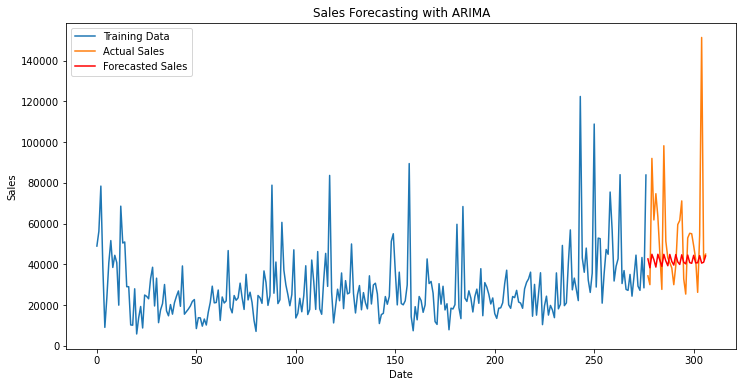

In [84]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Sales'], label='Training Data')
plt.plot(test.index, test['Sales'], label='Actual Sales')
plt.plot(forecast_index, forecast, label='Forecasted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecasting with ARIMA')
plt.legend()
plt.show()